## Machine Learning

In the following steps we will perform the following:

- Prepare the dataset
- Split in train and test
- Transform/Encode the features kand labels
- Test a wide range of ML models (Tree-based, Probabilistic and so on).
- Compare the accuracry of all models.
- Choose our winning model and tune hyperparameters to target a higher accuracy.
- Make a more profound evaluation of the result with a confusion matrix and different measures.
- Identify the most important features to predict the rating.

In [91]:
# import dependancies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
import warnings
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
import numpy as np
from scipy import stats
# Import the kerastuner library
import keras_tuner as kt


# Ignore all warnings
warnings.filterwarnings("ignore")



In [92]:
# read in data # NOTE TO REPLACE THIS WITH SQL

file_path = 'ML_dataset.csv' # REPLACE WITH FINAL DATABASE

df = pd.read_csv(file_path)

df.head()

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000,0
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583,0
2,Real Estate,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,...,12.97,29.98,0.019104,237.838,0.13,5.0,23.196667,88.260870,23.240833,0
3,Industrials,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,...,27.43,-18.14,0.023650,305.691,5.08,3.5,235.736667,11.037986,235.240833,0
4,Consumer Staples,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,...,4.55,10.21,0.019597,259.101,0.10,10.2,63.633333,72.448980,63.837083,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  1914 non-null   object 
 1   wr1                       1914 non-null   float64
 2   wr2                       1914 non-null   float64
 3   wr3                       1914 non-null   float64
 4   wr4                       1914 non-null   float64
 5   vol1                      1914 non-null   float64
 6   vol2                      1914 non-null   float64
 7   vol3                      1914 non-null   float64
 8   vol4                      1914 non-null   float64
 9   pe_ratio                  1914 non-null   float64
 10  debt_to_equity            1914 non-null   float64
 11  quick_ratio               1914 non-null   float64
 12  total_shareholder_return  1914 non-null   float64
 13  profit_margin             1914 non-null   float64
 14  free_cas

In [94]:
df = df.dropna()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  1914 non-null   object 
 1   wr1                       1914 non-null   float64
 2   wr2                       1914 non-null   float64
 3   wr3                       1914 non-null   float64
 4   wr4                       1914 non-null   float64
 5   vol1                      1914 non-null   float64
 6   vol2                      1914 non-null   float64
 7   vol3                      1914 non-null   float64
 8   vol4                      1914 non-null   float64
 9   pe_ratio                  1914 non-null   float64
 10  debt_to_equity            1914 non-null   float64
 11  quick_ratio               1914 non-null   float64
 12  total_shareholder_return  1914 non-null   float64
 13  profit_margin             1914 non-null   float64
 14  free_cas

## Preprocessing the data

- Separate the label and features 
- Encode numerical columns, in this case, the industry column
- Split the data into training and testing data
- Scaling the data based on the training data


In [96]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["label"]

# Separate the X variable, the features
X = df.drop(columns="label")

In [97]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [98]:
# Review the X variable DataFrame
X[:5]

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,total_shareholder_return,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,3.80,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,2.64,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583
2,Real Estate,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,...,4.97,12.97,29.98,0.019104,237.838,0.13,5.0,23.196667,88.260870,23.240833
3,Industrials,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,...,0.66,27.43,-18.14,0.023650,305.691,5.08,3.5,235.736667,11.037986,235.240833
4,Consumer Staples,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,...,2.18,4.55,10.21,0.019597,259.101,0.10,10.2,63.633333,72.448980,63.837083


In [99]:
# One-hot encode the 'industry' column
X = pd.get_dummies(X, columns=['industry'])

X.head()

,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,debt_to_equity,...,industry_Consumer Staples,industry_Energy,industry_Finance,industry_Health Care,industry_Industrials,industry_Miscellaneous,industry_Real Estate,industry_Technology,industry_Telecommunications,industry_Utilities
0,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,0.63,...,False,False,False,False,False,False,False,False,False,False
1,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,0.85,...,False,False,False,False,False,False,False,False,False,True
2,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,0.60,...,False,False,False,False,False,False,True,False,False,False
3,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,0.36,...,False,False,False,False,True,False,False,False,False,False
4,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,1.35,...,True,False,False,False,False,False,False,False,False,False


In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wr1                              1914 non-null   float64
 1   wr2                              1914 non-null   float64
 2   wr3                              1914 non-null   float64
 3   wr4                              1914 non-null   float64
 4   vol1                             1914 non-null   float64
 5   vol2                             1914 non-null   float64
 6   vol3                             1914 non-null   float64
 7   vol4                             1914 non-null   float64
 8   pe_ratio                         1914 non-null   float64
 9   debt_to_equity                   1914 non-null   float64
 10  quick_ratio                      1914 non-null   float64
 11  total_shareholder_return         1914 non-null   float64
 12  profit_margin       

In [101]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Predicting the label using Random Forest

In [102]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train_scaled,y_train)
y_pred_RF = RF_model.predict(X_test_scaled)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF_training_predictions = RF_model.predict(X_train_scaled)



RF Accuracy: 0.5031315240083507


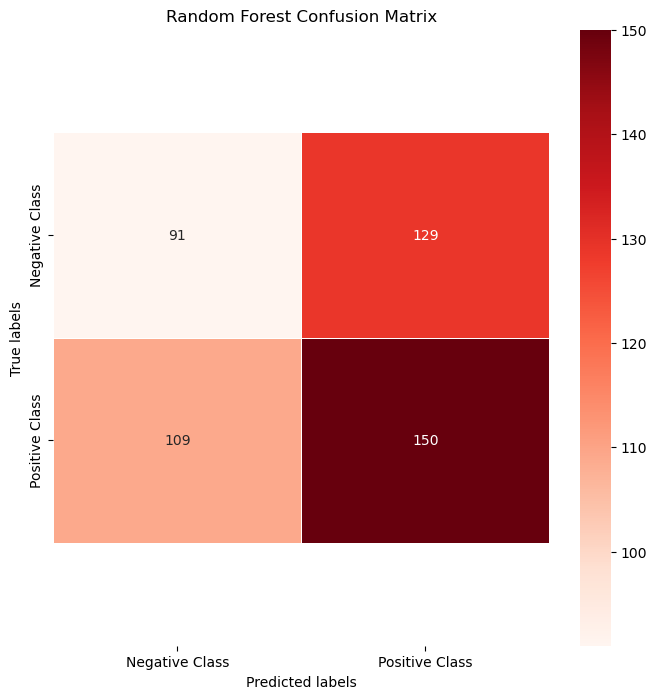

In [103]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [104]:
# Print the classification report for the model

 # Create and save the training classification report
training_report = classification_report(y_train, RF_training_predictions)
testing_report = classification_report(y_test, y_pred_RF)

# Print the training classification report
print("Random Forest Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report)
print("")
print("Random Forest Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report)

Random Forest Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435


Random Forest Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.41      0.43       220
           1       0.54      0.58      0.56       259

    accuracy                           0.50       479
   macro avg       0.50      0.50      0.50       479
weighted avg       0.50      0.50      0.50       479



#### From the matrix above it appears we have an over-fitting problem
______________________________________________________________________________________________________________________________

### Predicting the label using XGBoost

In [105]:
# Create a binary XGBoost model
XGB_model = xgb.XGBClassifier(objective='binary:logistic')

# Train the model
XGB_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_XGB = XGB_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy (Binary Classification):", accuracy_XGB)

XGB Accuracy (Binary Classification): 0.5615866388308977


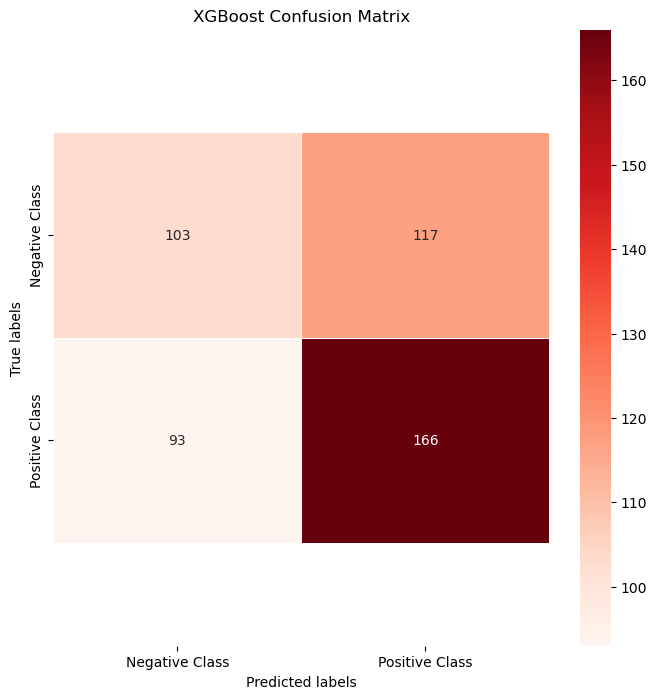

In [106]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('XGBoost Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()


In [107]:
# Print the classification report for the model

 # Create and save the training classification report
XGB_training_predictions = XGB_model.predict(X_train_scaled)

training_report = classification_report(y_train, XGB_training_predictions)
testing_report = classification_report(y_test, y_pred_XGB)

# Print the training classification report
print("XGBoost Classification Report: Training Data")
print("---------------------------------------------")
print(training_report)
print("")
print("XGBoost Classification Report: Testing Data")
print("--------------------------------------------")
print(testing_report)

XGBoost Classification Report: Training Data
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435


XGBoost Classification Report: Testing Data
--------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       220
           1       0.59      0.64      0.61       259

    accuracy                           0.56       479
   macro avg       0.56      0.55      0.55       479
weighted avg       0.56      0.56      0.56       479



#### Once again, we appear to have an over-fitting problem
_______________________________________________________________________________________________________________________________

### Predicting the label with Tensor Flow

In [108]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                2800      
                                                                 
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5871 (22.93 KB)
Trainable params: 5871 (22.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
           
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
           
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
45/45 [==============================] - 3s 5ms/step - loss: 0.6962 - accuracy: 0.5101
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5575
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5721
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.5854
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.5986
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.5993
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6209
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.6237
Epoch 9/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.6537
Epoch 10/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.6355
Epoch 11/

45/45 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.9749
Epoch 84/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9861
Epoch 85/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9770
Epoch 86/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9777
Epoch 87/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9854
Epoch 88/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9805
Epoch 89/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9826
Epoch 90/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9819
Epoch 91/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9812
Epoch 92/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9875
Epoch 93/100


In [110]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               3500      
                                                                 
 dense_10 (Dense)            (None, 60)                6060      
                                                                 
 dense_11 (Dense)            (None, 30)                1830      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11421 (44.61 KB)
Trainable params: 11421 (44.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
           
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
           
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
45/45 [==============================] - 2s 4ms/step - loss: 0.7101 - accuracy: 0.5366
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5429
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5547
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5540
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5686
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5847
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.5895
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.5930
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6300
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6279
Epoch 11/

45/45 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9791
Epoch 84/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9854
Epoch 85/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9812
Epoch 86/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9861
Epoch 87/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9902
Epoch 88/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9895
Epoch 89/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9902
Epoch 90/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9902
Epoch 91/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9930
Epoch 92/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9854
Epoch 93/100
